# Importing Required Modules

In [1]:
from csv import reader
import userfunction

# Reading timeseries data and converting each time series into a list

In [2]:
tsli=[]
with open('hctsa_timeseries-data.csv','r') as read_obj:
    csv_reader=reader(read_obj)
    li=list(csv_reader)
    for i in li:
        tsli.append(list(map(float,i)))

# Importing Datamatrix and features names

In [3]:
import pandas as pd
featurematrix=pd.read_csv('hctsa_datamatrix.csv',header=None)
featurename=pd.read_csv('hctsa_features.csv',header=None)

# Reading the analysis method name, passing each time series to analysis method and generates long feature vector.

In [4]:
fvector=[]
funcname=input("enter function")        ##########   each timeseries passes through model for feature vector   ########### 
from statsmodels.tsa.ar_model import AR
for i in range(len(tsli)):
    try:
        yhat=getattr(userfunction,funcname)(tsli[i])
        fvector.append(yhat)
    except ValueError as v:
        fvector.append(yhat)
        print(v,"on time series",i)
fvector=pd.DataFrame(fvector)

enter functionanalysismodel


c:\users\dell\python37\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


# Finding the column names having missing data more than the threshold limit.

In [5]:
def rmissingcol(dff,threshold):
    final=[]
    missing=[]
    final=list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns,1).columns.values)
    print("#columns having more than %s percent missing values : "%threshold,(dff.shape[1]-len(final)))
    missing.append(list(set(list((dff.columns.values)))-set(final)))
    for i in missing:
        for j in i:
            print(featurename.loc[j,0],f'  ({j})')
    return final
finalfeatures=rmissingcol(featurematrix,70)

#columns having more than 70 percent missing values :  8
DN_CompareKSFit_exp_relent   (3201)
DN_CompareKSFit_gamma_relent   (3206)
HT_DistributionTest_chi2wbl5   (1002)
DN_CompareKSFit_logn_relent   (3211)
DN_CompareKSFit_wbl_relent   (3216)
HT_DistributionTest_chi2rayl100   (986)
DN_CompareKSFit_rayleigh_relent   (3196)
HT_DistributionTest_chi2exp100   (991)


# Comparison of Each column from datamatrix with feature vector using Spearman's correlations.

In [25]:
from scipy.stats import spearmanr
alpha=0.05
correlatedfeatures=dict()
for i in finalfeatures:
    try:
        coef, p = spearmanr(featurematrix[i], fvector)
        if p < alpha:
            fec={coef:i}
            correlatedfeatures.update(fec)
    except BaseException as b:
        print(b)
bestmatches={k:correlatedfeatures[k] for k in sorted(correlatedfeatures.keys())[-10:]}

columnnumber=[]
for i in bestmatches.values():
    columnnumber.append(i)
columnnumber.reverse()

c:\users\dell\python37\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\dell\python37\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\dell\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\dell\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\dell\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Pointing best correlations with their feature name and plotting it.

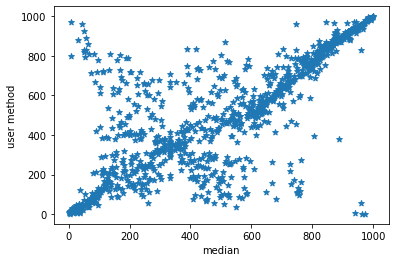

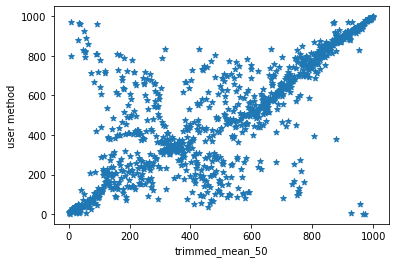

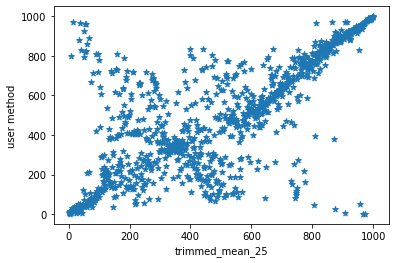

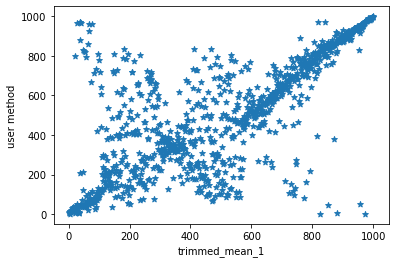

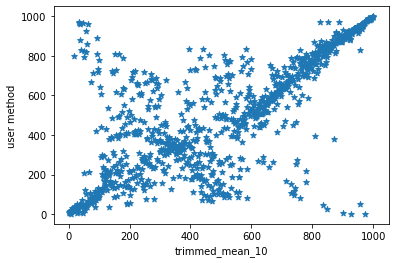

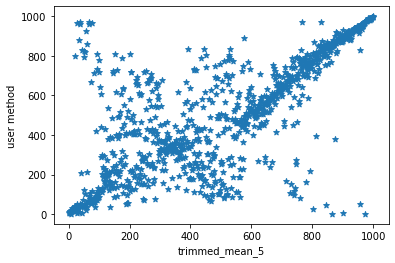

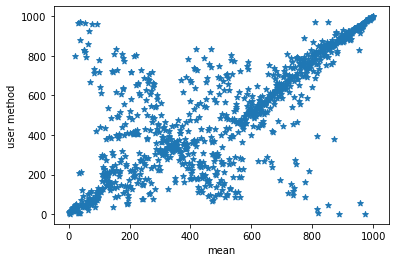

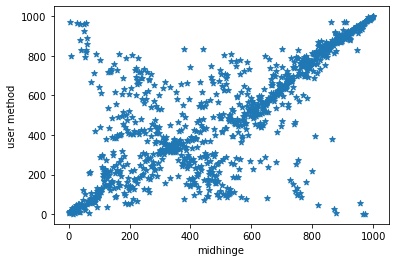

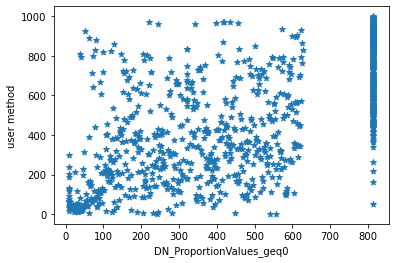

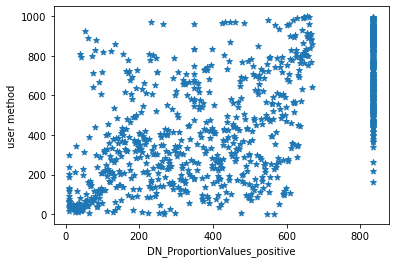

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
for i in columnnumber:
    
    plt.scatter(pd.Series(featurematrix[i]).rank(),pd.Series(fvector[0]).rank(),marker='*')
    plt.xlabel(featurename.loc[i,0])
    plt.ylabel("user method")
    plt.figure()